In [1]:
from IPython.core.display import HTML

HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Grundlagen künstlicher Intelligenz
<br><br>
Sommersemester 2020
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Machine Learning Algorithms & Clustering"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Freitag, 26.06.2020 (23:55 Uhr)</i>
</div>

4. Lassen Sie sich lineare Regressions Modelle für gepaarte Features anzeigen. Wie schätzen Sie die Güte dieser Methode ein? Für welche zwei Features passt es am besten und wie würden Sie das semantisch interpretieren?<br><br>
*View linear regression models for paired features. How do you rate the quality of this method? For which two features does it best fit and how would you interpret it semantically?*

<div class="alert alert-info">
sns.pairplot(iris_sns, kind="reg"). Eher schlecht; aber petal_length und petal_width (Blütenbreite und -länge) hängt zusammen, z.B. Breite 2 Länge 6
</div>
<div class="alert alert-info">
sns.pairplot(iris_sns, kind="reg"). Rather bad; however, petal_length and petal_width are correlated, for example: Width 2 Length 6
</div>

    Animated  Violent  Fsk_Rating  Genre
0          0        1          18      0
1          0        1          16      0
2          0        1          16      0
3          0        1          16      0
4          0        1          16      0
5          0        1          12      0
6          0        0          12      0
7          0        1          18      0
8          0        1          16      0
9          0        1          18      0
10         1        0          12      1
11         1        1          12      1
12         1        1          12      1
13         1        1          12      1
14         0        0          12      1
15         0        0          12      1
16         0        0          12      1
17         0        1          12      1
18         0        0          12      1
19         1        1          12      1


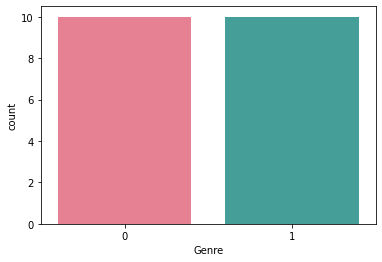

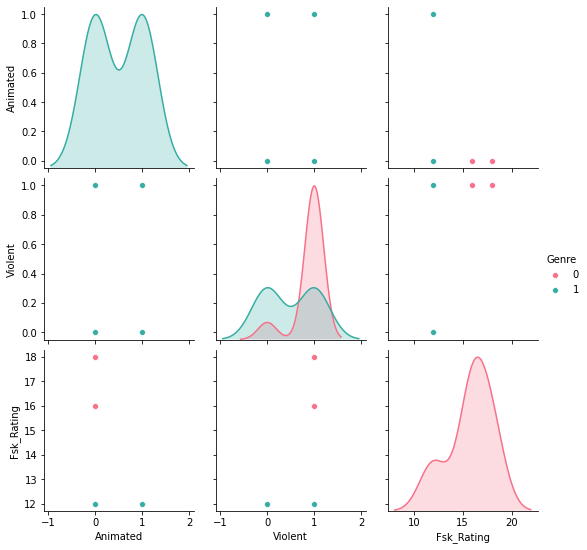

In [14]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv('Serien.csv')

df
#train= df['Genre']
#test = df.drop('Genre', axis=1)

#train

#test

# show the class distribution
%matplotlib inline 
print(df)


sns.countplot(x="Genre", data = df, palette="husl")

sns.pairplot(df, hue="Genre", palette="husl")

<div class="task_description">
    <i class="task">Task 2:</i> <br>
</div>

1. Lassen Sie sich den Baum (ohne Tiefenbegrenzung) ausgeben. Was fällt Ihnen auf? An welchen Stellen sind weitere Knoten nicht sinnvoll und wie könnte man das beheben?<br><br>
*Output the tree (without depth limit). What do you notice? At which points are further nodes not useful and how could this be corrected?*

<div class="alert alert-info">
Es bleiben nur noch wenige Instanzen in einzelnen Klassen bei einigen Knoten übrig, Baum sollte gekürzt werden.
</div>
<div class="alert alert-info">
There are only a few instances left for each of the classes at some nodes. The depth of the tree should be minimized.
</div>

2. Schauen Sie sich folgenden Code Zeilen an. Gini Index und Entropy bewerten jeweils die Knoten und können beim Decision Tree angewendet werden. Was wäre hier unvorteilhafter? Vergleichen Sie beim Digit Datensatz.<br><br>
*Look at the following code lines. Gini Index and Entropy both evaluate the nodes and can be applied to the decision tree. What would be more unfavorable? Compare them with the digit data set.*

In [ ]:
# gini_score = 1 - sum([i**2 for i in values])
# entropy_score = sum([-i*log(i,2) for i in values])

<div class="alert alert-info">
Entropy wegen des Logarithmus länger bei mehr Daten
</div>

In [ ]:
import time
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split

# digits to see difference in gini vs entropy
# dig = load_digits()
# X_train, X_test, y_train, y_test = train_test_split(dig.data, dig.target, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(iris_skl.data, iris_skl.target, test_size=0.33)

t0 = time.process_time()
classifier = tree.DecisionTreeClassifier(criterion="gini", max_depth=None)
classifier = classifier.fit(X_train, y_train)
t1 = time.process_time()
time1 = t1-t0
print("Time needed with", classifier.criterion, ":", time1)
classifier2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=None)
classifier2 = classifier2.fit(X_train, y_train)
t2 = time.process_time()
time2 = t2-t1
print("Time needed with", classifier2.criterion, ":", time2)
if time1 < time2:
    print("Fastest method:", classifier.criterion)
elif time2 < time1:
    print("Fastest method:", classifier2.criterion)
else:
    print("Same time.")

y_pred = classifier.predict(X_test)
print("Pred: ", y_pred[0:20], ".....")
print("Orig: ", y_test[0:20], ".....")
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image, display

# Export as dot file
export_graphviz(classifier, out_file='tree.dot',
                feature_names=iris_skl.feature_names,
                class_names=iris_skl.target_names, 
                filled=True, rounded=True,
                special_characters=True)

# Convert to png using system command (requires Graphviz)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'], shell=True)

# Display in jupyter notebook
display(Image(filename = 'tree.png'))

<div class="task_description">
    <i class="task">Task 3:</i> <br>
</div>

Schauen Sie sich den unten gegebenen Code an.<br><br>
*Take a look at the code below.*


KNeighborsClassifier
Accuracy on Training Set: 99.2205%
Accuracy on Test Set: 96.3293%
SVC
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 94.4383%
DecisionTreeClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 77.0857%
RandomForestClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 92.5473%
MLPClassifier
Accuracy on Training Set: 100.0000%
Accuracy on Test Set: 92.2136%
GaussianNB
Accuracy on Training Set: 85.8575%
Accuracy on Test Set: 80.7564%


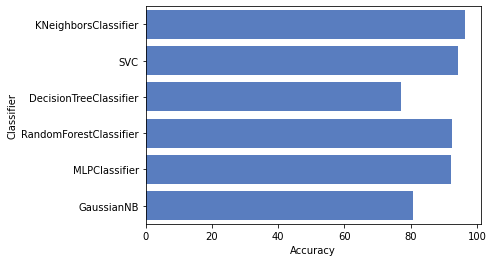

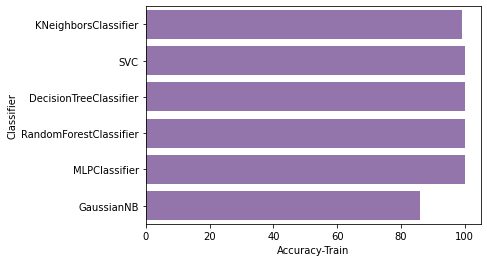

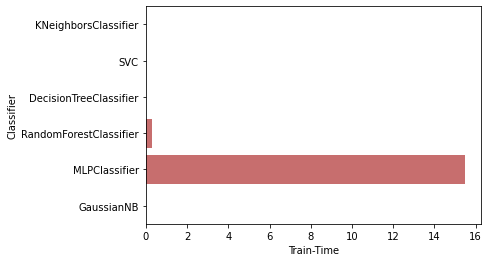

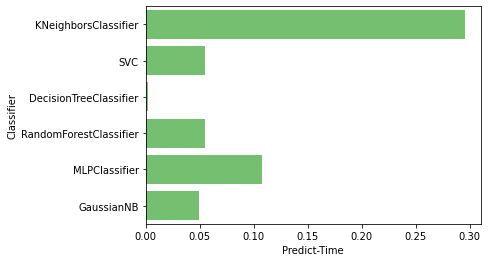

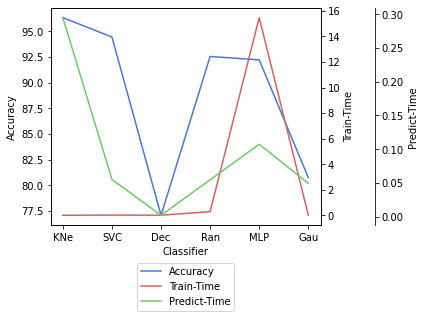

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import datasets, svm, tree, metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

x_train, y_train = data[:n_samples // 2], digits.target[:n_samples // 2]
x_test, y_test = data[n_samples // 2:], digits.target[n_samples // 2:]

log_cols=["Classifier", "Accuracy", "Train-Time", "Predict-Time", "Accuracy-Train"]
log = pd.DataFrame(columns=log_cols)
log_short = pd.DataFrame(columns=log_cols)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(),
    GaussianNB()]

for clf in classifiers:
    t0 = time.process_time()
    clf.fit(x_train, y_train)
    t1 = time.process_time()
    training_time = t1-t0
    
    name = clf.__class__.__name__
    name_short = clf.__class__.__name__[:3]
    
    print("="*30)
    print(name)
    
    t0 = time.process_time()
    predictions = clf.predict(x_test)
    predictions_train = clf.predict(x_train)
    t1 = time.process_time()
    predict_time = t1-t0

    acc_train = accuracy_score(y_train, predictions_train)
    print("Accuracy on Training Set: {:.4%}".format(acc_train))
    acc = accuracy_score(y_test, predictions)
    print("Accuracy on Test Set: {:.4%}".format(acc))
        
    log_entry = pd.DataFrame([[name, acc*100, training_time, predict_time, acc_train*100]], columns=log_cols)
    log = log.append(log_entry)
    log_entry_short = pd.DataFrame([[name_short, acc*100, training_time, predict_time, acc_train*100]], columns=log_cols)
    log_short = log_short.append(log_entry_short)
    
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.show()
sns.barplot(x='Accuracy-Train', y='Classifier', data=log, color="m")
plt.show()
sns.barplot(x='Train-Time', y='Classifier', data=log, color="r")
plt.show()
sns.barplot(x='Predict-Time', y='Classifier', data=log, color="g")
plt.show()


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)


fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot('Classifier', 'Accuracy', data=log_short, color="b")
p2, = par1.plot('Classifier', 'Train-Time', data=log_short, color="r")
p3, = par2.plot('Classifier', 'Predict-Time', data=log_short, color="g")

host.set_xlabel("Classifier")
host.set_ylabel("Accuracy")
par1.set_ylabel("Train-Time")
par2.set_ylabel("Predict-Time")

lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], loc="upper center", bbox_to_anchor=(0.5, -0.15))

plt.show()

1. Vergleichen Sie die einzelnen Classifier anhand der Plots, woran würden Sie die Qualität fest machen? Wie würden Sie die Laufzeit gewichten?<br><br>
*Based on the plots, compare the classifiers to each other. How would you determine the quality of the classifier? How would you weight the runtime?*

<div class="alert alert-info">
Accuracy und Laufzeit. Laufzeit hier gering, was wäre bei mehr Daten?
</div>
<div class="alert alert-info">
Accuracy and runtime. Runtime is quite fast here, but what if we had more data?
</div>

2. Schauen Sie sich die Plots an. Warum ist die Accuracy bei den Trainingsdaten besser als bei den Testdaten?<br><br>
*Take a look at the plots. Why is accuracy better for the training data than for the test data?*

<div class="alert alert-info">
    Testdaten unbekannt, Trainingsdaten bekannt
</div>
<div class="alert alert-info">
    Test data is unknown, while training data is known.
</div>


3. Schauen Sie sich die Parameter beim SVC an. Handelt es sich um einen hard margin oder soft margin und was halten Sie prinzipiell für besser?<br><br>
*Look at the parameters of the SVC. Is it a hard margin or soft margin and what do you think is better in principal?*


<div class="alert alert-info">  
Soft Margin wäre besser.
</div>
<div class="alert alert-info">
Soft margin would be better.
</div>

4. Welchen Classifier würden Sie als am schlechtesten einschätzen? Woran könnte das liegen? Binden Sie eine mögliche Verbesserungsmethode ein.<br><br>
*Which classifier would you consider to be the worst? What could be the reason? Suggest a possible improvement.*

<div class="alert alert-info">
Decision Tree, eventuell Overfitting, max_depth festlegen z.B. 10-15
</div>
<div class="alert alert-info">
Decision Tree, probably because of overfitting. We could set the max_depth to be, for instance, 10-15.
</div>

5. Übliche Größen für Test Sets sind 10-20% der Daten. Ändern Sie den Code dahingehend und schauen Sie sich die Veränderungen. Woher kommen die Verbesserungen?<br><br>
*Common sizes for test sets are 10-20% of the data. Change the code accordingly and look at the changes. Where do the improvements come from?*

<div class="alert alert-info">
split = int(len(data)\*0.9)

x_train, y_train = data\[:split], digits.target[:split]

x_test, y_test = data[split:], digits.target[split:]

Verbesserung, mehr Daten einbezogen, auf weniger getestet.<br>
Improvements happen because we used more data for training and less for testing.
</div>

## Clustering

<div class="task_description">
    <i class="task">Task 4:</i> <br>
</div>

1. Für welche Art von Problemen wird Clustering verwendet im Vergleich zu anderen Machine Learning Verfahren? Nennen Sie ein Beispiel.<br><br>
*What kind of problems would clustering be used for, in comparison to other Machine Learning models? Name an example.*

<div class="alert alert-info">
  <ul>
      <li> Keine gold label, nur "ähnliche" Daten zusammengefasst </li>
      <li> Amazon, Kaufempfehlungssysteme </li>
  </ul>
</div>

<div class="alert alert-info">
  <ul>
      <li> There are no gold labels in the dataset, similar data are grouped/clustered together </li>
      <li> Amazon, recommender systems </li>
  </ul>
</div>

2. Schauen Sie sich den untenstehenden Code und dessen Ausgabe an. Welches k ist optimal und wie sehen die Cluster aus?<br><br>
*Look at the code below and its output. What is the optimum value for k and how does the cluster look like?*

For n_clusters = 2 The average silhouette_score is : 0.25931695553182543
Nr of samples per Cluster:  [91 87]


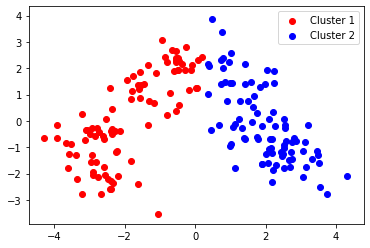

For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
Nr of samples per Cluster:  [51 62 65]


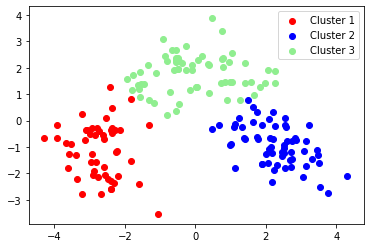

For n_clusters = 4 The average silhouette_score is : 0.25987462789190524
Nr of samples per Cluster:  [55 46 49 28]


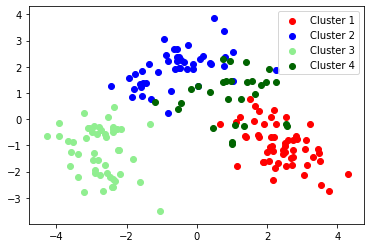

For n_clusters = 5 The average silhouette_score is : 0.19734439798042422
Nr of samples per Cluster:  [56 41 25 27 29]


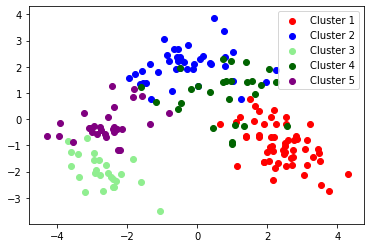

For n_clusters = 6 The average silhouette_score is : 0.1381694051986392
Nr of samples per Cluster:  [20 35 31 41 25 26]


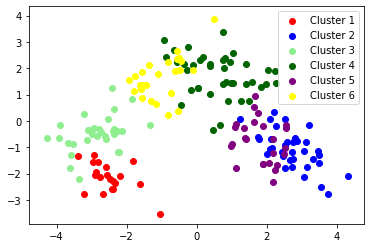

For n_clusters = 7 The average silhouette_score is : 0.1554351478858128
Nr of samples per Cluster:  [42 21 25 23 30 17 20]


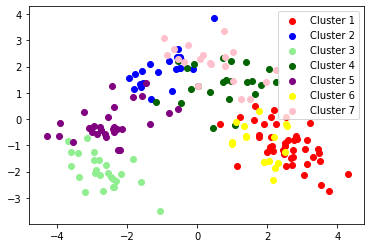

   Clusters   K-Means
0         2  0.259317
1         3  0.284859
2         4  0.259875
3         5  0.197344
4         6  0.138169
5         7  0.155435


In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Settings:
min_clusters = 2
max_clusters = 8
colors = ['red', 'blue', 'lightgreen', 'darkgreen', 'purple', 'yellow', 'pink']

# Load dataset and drop column 'target'.
data = pandas.read_csv("data/ex9/wine_data_mod.csv", sep=",")
data = data.drop("target", axis=1)

# Extract the values and preprocess them.
winearray = data.values
winearray_norm = sklearn.preprocessing.scale(winearray)
kmeans_sil_scores = []

for num_clusters in range(min_clusters, max_clusters):
    # Execute KMeans algorithm.
    clusterer = sklearn.cluster.KMeans(n_clusters=num_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(winearray_norm)
    
    # Compute silhouette score.
    silhouette_avg = silhouette_score(winearray_norm, cluster_labels)
    print("For n_clusters =", num_clusters, "The average silhouette_score is :", silhouette_avg)
    print("Nr of samples per Cluster: ", np.bincount(cluster_labels))    
    kmeans_sil_scores.append([num_clusters, silhouette_avg])
    
    # Project the dataset into lower dimensional space
    pca = PCA()
    transformed = pd.DataFrame(pca.fit_transform(winearray_norm))
    
    # Plot the clustering results.
    for c, color in zip(range(num_clusters), colors):
        x = transformed[cluster_labels==c][0]
        y = transformed[cluster_labels==c][1]
        
        plt.scatter(x, y, label='Cluster {}'.format(c + 1), color=color)
    
    # Show the resulting visualization.
    plt.legend()
    plt.show()

    
table_index = []
table_kmeans = []

for num_clusters, silhouette_avg in kmeans_sil_scores:
    table_index.append(num_clusters)
    table_kmeans.append(silhouette_avg)

# Print the results as a table.
df = pandas.DataFrame({'Clusters':table_index, 'K-Means':table_kmeans})
print(df[['Clusters', 'K-Means']])

<div class="alert alert-info">
 k = 3 (3 Cluster) ist am besten, teilen sich auf in 51, 62 und 65; tatsächliche Verteilung: 59,71,48
</div>
<div class="alert alert-info">
 k = 3 (3 clusters) is the best. It divides the data into 51, 62 and 65 samples, while the actual distribution is 59, 71 and 48 samples.
</div>

# Hausübung

### Abgaberichtlinien
* Jede Hausübung bringt maximal 10 Hausaufgabenpunkte. 10 Hausaufgabenpunkte entsprechen einem Klausurpunkt.
* Im Laufe des Semesters kann es zusätzliche Bonuspunkte (= 1 Klausurpunkt) für Hausübungen geben, in Form von z.B. Challenges, weitere Informationen folgen bei den betreffenden Hausübungen.
* Die Abgabe erfolgt in Zweier- oder Dreierteams. **Einzelabgaben werden nicht gewertet**. Die Teammitglieder müssen nicht in derselben Übungsgruppe sein. Bei Problemen bzw. Einzelfällen hinsichtlich dieser Richtlinie kontaktieren Sie einen Tutor.
* In der Abgabe müssen alle Teammitglieder mit **Namen und Matrikelnummern gut sichtbar** genannt werden.
* Es muss immer nur **ein Teammitglied der Gruppe abgeben**. Sollten aus Versehen mehrere Abgaben der selben Übung erfolgen, kommunizieren Sie dies **zeitnah** an einen Tutor, ansonsten wird die erste korrigierte Abgabe gewertet.
* Die Abgabe soll als Jupyter-Notebook erfolgen (.ipynb). Abgaben in einem **anderen Format werden nicht gewertet**. Bei Problemen hinsichtlich dieser Richtlinie kontaktieren Sie einen Tutor.
* Es ist nicht nötig, den Präsenzübungsteil in der Abgabe mit abzugeben. Es wird lediglich der Hausübungsteil gewertet.
* Wenn Bilder mit abgegeben werden, ist es erlaubt, diese zusammen mit dem Notebook als zip-Ordner abzugeben. Diese sollten folgendermaßen eingefügt werden: ``![Beispiel1](Beispielbild1.PNG)`` (ohne Apostrophe in einer Markdown-Cell).

### *Submission guidelines*
* *You can reach up to 10 homework points for every homework submission. 10 homework points correspond to one exam point.*
* *In the course of the semester, there will be extra bonus points (where each bonus point equals to one exam point) for the homeworks. These will be given in the form of e.g. challenges inside the homeworks. More information will be given in the corresponding homeworks.*
* *The submission has to be done by a team of two to three people. **Individual submissions will not be graded**. The team members do not have to attend the same exercise group. If there are any problems regarding this guideline, please reach out to a tutor.*
* *Please state the **name and matriculation number of all team members** in every submission **clearly**.*
* *Only **one team member should submit** the homework. If more than one version of the same homework is submitted by accident (submitted by more than one group member), please reach out to a tutor **as soon as possible**. Otherwise, the first submitted homework will be graded.*
* *The submission must be in a Jupyter Notebook format (.ipynb). Submissions in **other formats will not be graded**. If there are any problems regarding this guideline, please reach out to a tutor.*
* *It is not necessary to also submit the part of the exercise discussed by the tutor, please only submit the homework part.*
* *If pictures need to be submitted, it is allowed to hand them in in a zip folder, together with the notebook. They should be added to the notebook like this: ``![example1](examplepicture1.PNG)`` (without apostrophs in a Markdown-Cell).*

<div class="task_description">
    <i class="task">Homework 1:</i>
        ::: 10 Hausaufgabenpunkte :::</div>

Gehen Sie jeden der folgenden Schritte durch und berichten Sie kurz über Ihr Vorgehen:<br><br>
<i>Go through the following steps and make a short report on your approach: </i>

1. Erstellen Sie einen kurzen dummy Datensatz (MeinDatensatz.csv) mit mindestens 20 Instanzen zu einem Thema Ihrer Wahl. Dieser sollte min. 2 Features und ein gold label enthalten. <br/> Falls Ihnen kein Thema einfällt können sie eins der folgenden wählen:
<ul>
    <li> Lieblingsbücher (target: 1-5 Sternebewertung) </li>
    <li> Fernsehserien (target: Genre) </li>
    <li> Schmuck (target: Preis) </li>
</ul>
<br>    
<i>Create a short dummy record (MyDataset.csv) with at least 20 instances on a topic of your choice. This should contain at least 2 features and a gold label. <br/> If you can't think of a topic, you can choose one of the following:</i>
<br><br>
<ul>
    <li><i> Favourite books (target: 1-5 star rating) </i></li>
    <li><i> TV series (target: genre) </i></li>
    <li><i> Jewellery (target: price)</i></li>
</ul>
<br><br>
2. Nutzen Sie die Daten im Machine Learning Prozess. <br> Dazu gehört: Daten aufsplitten, Classifier aussuchen (Begründen Sie Ihre Wahl), Test-Daten klassifizieren. <br> <br>*Use the data in the machine learning process. <br> This includes: splitting the data, selecting classifiers (justify your choice), classifying test data.* 
<br><br>
3. Evaluieren Sie die Ergebnisse. Geben Sie dafür Beispiele zu mindestens 2 von Ihnen gewählten Evaluierungsmaßen und beschreiben Sie als wie gut Sie die Ergebnisse halten und was man evtl. verbessern könnte.<br><br>*Evaluate the results. Give examples of at least 2 evaluation measures you have chosen and describe how well you think the results are and what could be improved.* <br>

__Hinweis!__ In der Abgabe müssen folgende Elemente enthalten sein:
1. Datensatz
2. Code
3. Ein kurzer Bericht über die Vorgehensweise
4. Ausgaben wie z.B. Evaluierungsmaße

*__NOTE!__ The following elements must be included in the submission:*<br>
1. *data set*
2. *code*
3. *a brief report on the approach taken*
4. *outputs such as evaluation measures*


Die Punkte 2 bis 4 sind zusammen in einem Jupyter Notebook abzugeben.<br>
*The tasks 2 to 4 are to be handed in together in a Jupyter notebook.*